In [3]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.204 Seconds
Building LP ...
	Done. Took 0.190 Seconds
Building M ...
	Done. Took 0.076 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 0.763
	Done. Took 0.950 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): 10.000*(-0.840)^t + -5.652*(-0.877)^t + -4.528*(-0.780)^t + 0.180327 * delta(t,0)
		RMSE = 0.104
		Matlab: [10.   -0.84 -5.65 -0.88 -4.53 -0.78]
	Done. Took 5.538 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): 3.966*(0.398)^t + -6.646*(0.236)^t + -1.165*(0.236)^t + 3.845022 * delta(t,0)
		RMSE = 0.083
		Matlab: [ 3.97  0.4  -6.65  0.24 -1.16  0.24]
	Done. Took 1.958 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1): 5.736*(-0.060)^t + -1.472*(0.371)^t + 3.790*(0.241)^t + -8.054554 * delta(t,0)
		RMSE = 0.077
		Matlab: [ 5.74 -0.06 -1.47  0.37  3.79  0.24]
	Done. T

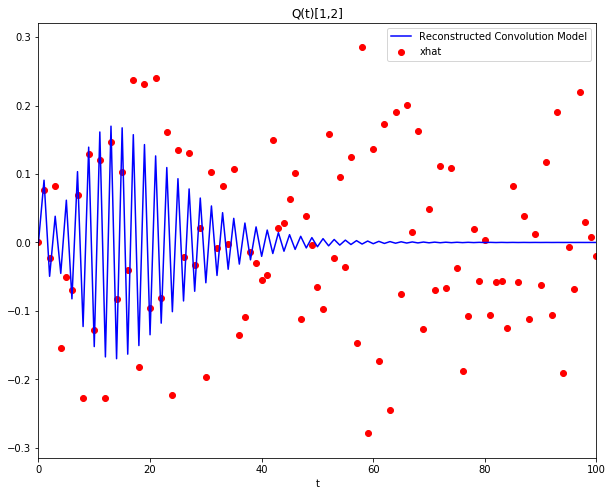

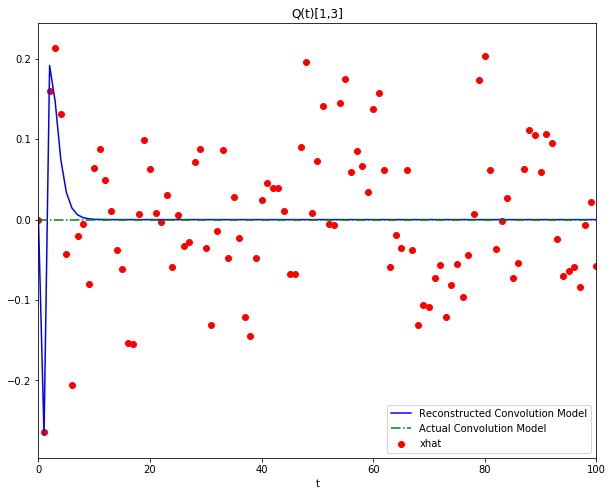

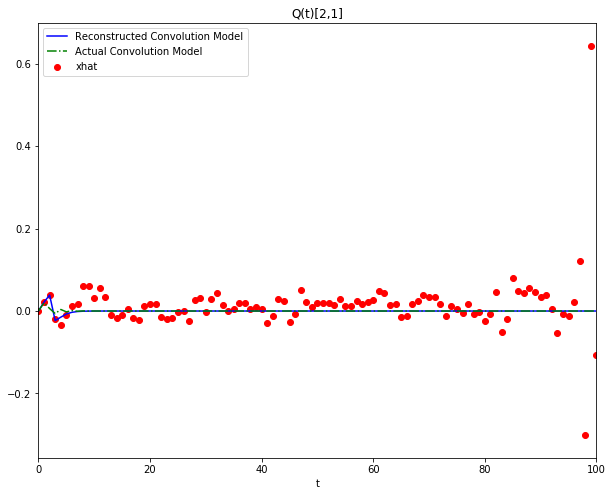

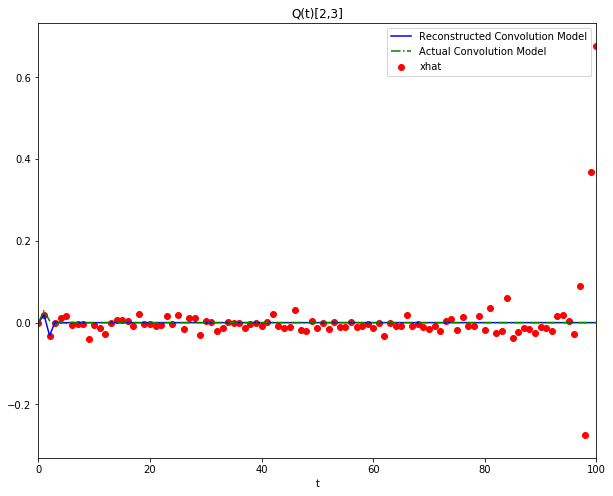

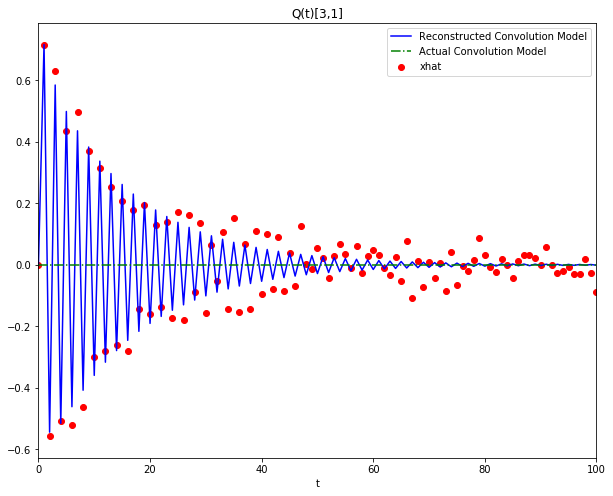

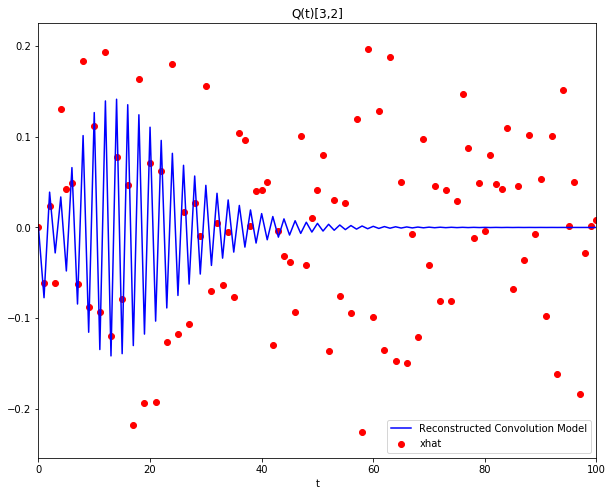

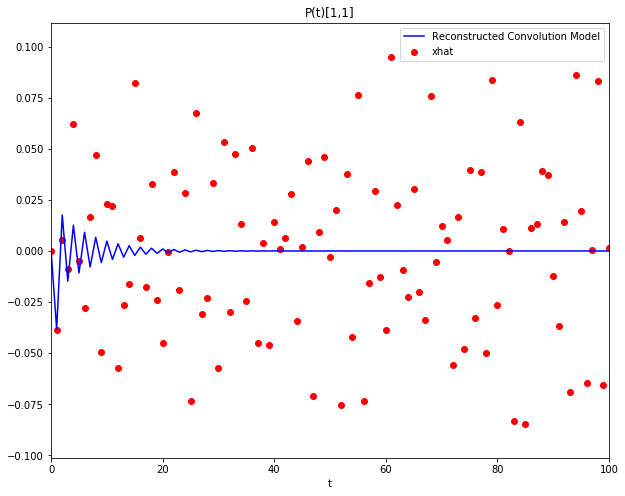

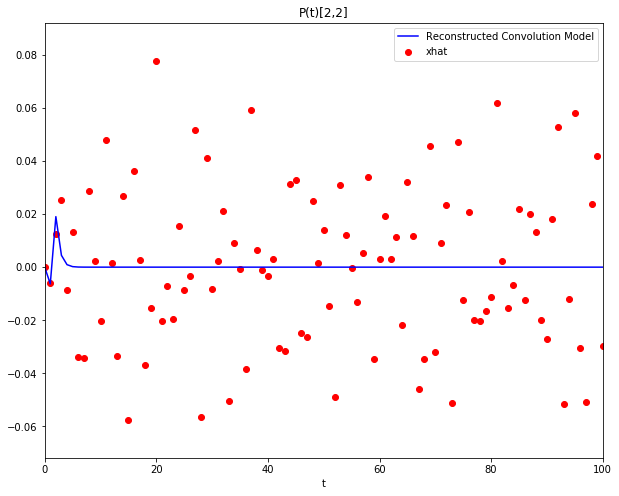

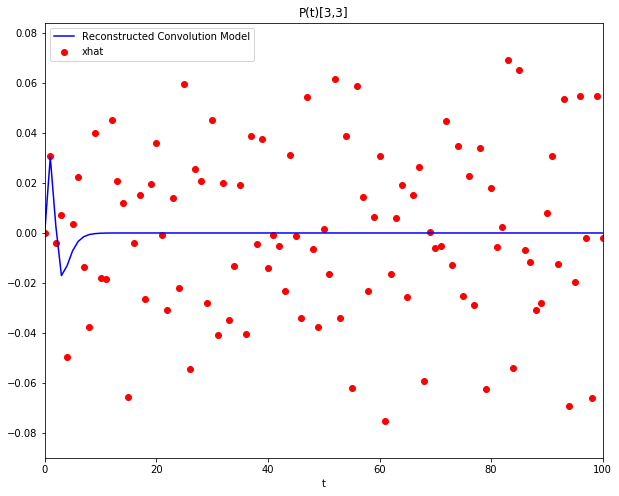

In [13]:
%matplotlib inline
A = [
    [-0.1, 0.05, 0, 0.1, 0, 0.1],
    [0.02, -0.2, 0.03, 0, 0.1, 0],
    [0, -0.04, -0.3, 0.1, 0, 0.1],
    [0, 0.1, 0, -0.4, 0, 0],
    [0.1, 0, 0.1, 0, -0.5, 0],
    [0, 0.1, 0, 0, 0, -0.6]

] 
A = np.array(A) 
B = [
    [0, 0.05, 0],
    [0.02, 0, 0.03],
    [0, -0.04, 0],
    [0, 0.1, 0],
    [0.1, 0, 0.1],
    [0, 0.1, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)
D = np.identity(3)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
uones = np.ones(u.shape)
y = ss_sim(A, B, C, u)
Pbool = np.identity(3)

real_params = {
    (1, 3): [0, 0],
    (3, 1): [0, 0],
    (2, 1): [-0.267, -0.2, 0.067, -0.5],
    (2, 3): [-0.315, -0.2, 0.067, -0.5],
    (1, 2): [-1.033, -0.1, 0.083, -0.4, 0.033, -0.6],
    (3, 2): [-0.311, -0.3, 0.025, -0.4, 0.056, -0.6]
}

recon = Reconstructor(
    debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=10, 
    order=3, real_params=real_params, robust=False,
    njobs=1, build_P=True
)
Qp, Pp = recon.measured(y, uones, plot=True)  #, ij=(1,3))

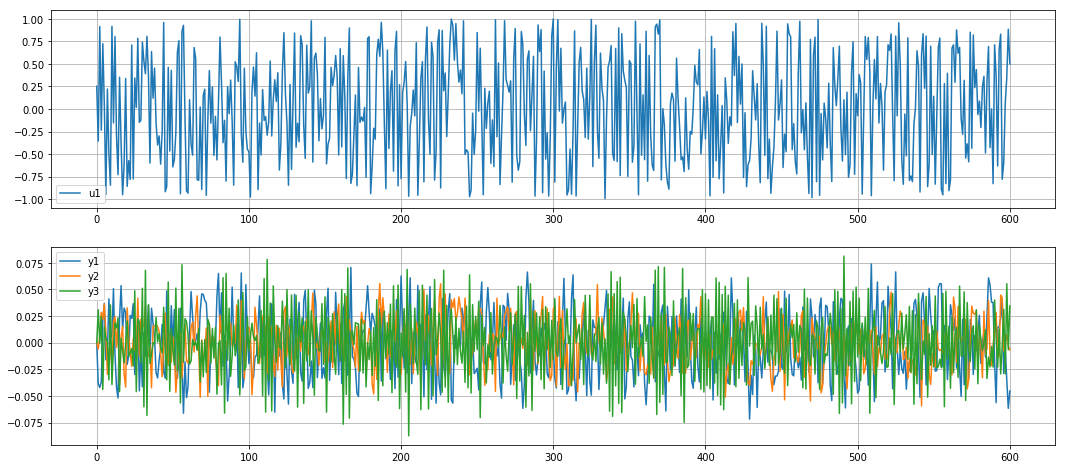

In [14]:
%matplotlib inline
plt.figure(figsize=(18,8))
ax = plt.subplot(211)
t = range(u.shape[0])
plt.plot(t, u[:,0], label='u1')
plt.legend()
plt.grid()

plt.subplot(212, sharex=ax)
plt.plot(t, y[:,0], label='y1')
plt.plot(t, y[:,1], label='y2')
plt.plot(t, y[:,2], label='y3')
plt.legend()
plt.grid()

(array([ 1.33+0.j  , -0.36+1.43j, -0.36-1.43j, -1.51+0.j  , -0.15+0.j  , -0.3 +0.j  ]),
 array([[-0.56+0.j  , -0.13+0.39j, -0.13-0.39j,  0.27+0.j  , -0.71+0.j  , -0.1 +0.j  ],
        [-0.46+0.j  ,  0.08-0.41j,  0.08+0.41j,  0.32+0.j  ,  0.  +0.j  ,  0.03+0.j  ],
        [-0.25+0.j  ,  0.1 +0.41j,  0.1 -0.41j,  0.51+0.j  ,  0.7 +0.j  ,  0.1 +0.j  ],
        [-0.29+0.j  , -0.29-0.03j, -0.29+0.03j, -0.26+0.j  ,  0.02+0.j  , -0.7 +0.j  ],
        [-0.5 +0.j  ,  0.56+0.j  ,  0.56-0.j  , -0.65+0.j  , -0.07+0.j  , -0.02+0.j  ],
        [-0.28+0.j  , -0.28-0.05j, -0.28+0.05j, -0.28+0.j  ,  0.01+0.j  ,  0.7 +0.j  ]]))

In [5]:
print(A)

[[-0.1   0.05  0.    0.1   0.    0.1 ]
 [ 0.02 -0.2   0.03  0.    0.1   0.  ]
 [ 0.   -0.04 -0.3   0.1   0.    0.1 ]
 [ 0.    0.1   0.   -0.4   0.    0.  ]
 [ 0.1   0.    0.1   0.   -0.5   0.  ]
 [ 0.    0.1   0.    0.    0.   -0.6 ]]
